# Capstone Project - The Battle of Neighborhoods

## Introduction/Business Problem

#### introduction where you discuss the business problem and who would be interested in this project.

### "Which district in 4 cluster from 9 main economic center district in  Bangkok for recommend new entrepreneur can open coffee shop and  still have opportunity escape STARBUCK and other Coffee Shop from dense area" <br>
##### i adjust little my interested

### List of 9 economic center district in Bangkok
1. Sathon(เขตสาทร)  
1. Pathumwan(เขตปทุมวัน) 
1. Ratchathewi(เขตราชเทวี)  
1. Phaya Thai(เขตพญาไท) 
1. phra nakhon(เขตพระนคร)
1. Sompanthawong (เขตสัมพันธวงศ์)
1. Pomprap (เขตป้อมปราบศัตรูพ่าย)
1. Bangruk (เขตบางรัก)
1. Dusit (เขตดุสิต)

### In a trend of drink coffee are coming so many people want to open a new coffee shop but how they know where is a district in Bangkok suitable for open new business by not is the competitor with world largest coffee company and exist coffee shop dense in area.  I will use Foursquare venues category locations with local district location to select district from 4 clusters from 9 district in Bangkok that have an opportunity to open a new coffee shop. Which location should be suggested to the new entrepreneur?

# Data

#### Data where you describe the data that will be used to solve the problem and the source of the data. <br/>

According to the question, following data to resolve the problem.



 1. Geographic coordinate of Bangkok and Disticct

i can find location of bangkok and district from  http://nominatim.openstreetmap.org/   then use  http://polygons.openstreetmap.fr/index.py to get polygon of district before create locations area before use 
Foresqure to get coffee venues in bangkok and plot to map

Bangkok district data https://nominatim.openstreetmap.org/details.php?place_id=198742921

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium # map rendering library
from shapely.geometry import Polygon
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [2]:
address = 'Bangkok'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangkok are {}, {}.'.format(latitude, longitude))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Bangkok are 13.7538929, 100.8160803.


In [3]:
map_bangkok = folium.Map(location=[latitude, longitude], zoom_start=9)

### Map Bangkok

In [4]:
map_bangkok.choropleth(geo_data='datasets/bangkok_geojson.txt',fill_color=None, fill_opacity=0.1,name='กรุงเทพ', legend_name='กรุงเทพ')

In [5]:
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import lxml.html as lh
import geocoder
import json
from flask import jsonify
import os

### get all district of bangkok from list

In [6]:
bangkok = pd.read_excel('datasets/BangkokGeoData.xlsx')
bangkok.head()

,Local name,OSM,Address rank,Admin level,Distance
0,วัฒนา,2938036,12,6,~22.9 km
1,เขตสาทร,3147425,12,6,~28.7 km
2,เขตดุสิต,92069,12,6,~30.5 km
3,เขตบางนา,3146412,12,6,~19.9 km
4,เขตบางแค,2946804,12,6,~42.4 km


### LIST 9 CBD at Bangkok

In [7]:
CBD = ["เขตสาทร","เขตปทุมวัน","เขตราชเทวี","เขตพญาไท","เขตพระนคร","เขตสัมพันธวงศ์","เขตป้อมปราบศัตรูพ่าย","เขตบางรัก","เขตดุสิต"]

### use OSM and API from Openstreet map for load data if not exist for fast load district next time

In [8]:
datadist = {}
CBDlist ={}
for index, district in bangkok.iterrows():
    filename = 'datasets/GeoData/'+district['Local name']+'_data.json'
    exists = os.path.isfile(filename)
    if exists:
        #print('a')
        with open(filename) as f:
            geodata = json.load(f)
            colormap = 'orange'
            if district['Local name'] in CBD:
                CBDlist[district['Local name']] =geodata
                colormap = 'blue'
            map_bangkok.choropleth(geo_data=geodata['geojson'],fill_color=colormap, fill_opacity=0.1,name=district['Local name'], legend_name=district['Local name'])
            datadist[district['Local name']] =geodata
    else:
        print('b')
        url = "https://nominatim.openstreetmap.org/reverse?format=json&osm_id={}&osm_type=R&polygon_geojson=1".format(district['OSM'])
        data =requests.get(url)
        geodata = json.loads(data.content)
        colormap = 'orange'
        if district['Local name'] in CBD:
            CBDlist[district['Local name']] =geodata
            colormap = 'blue'
        with open(filename, 'w') as outfile:
            json.dump(geodata, outfile)
        map_bangkok.choropleth(geo_data=geodata['geojson'],fill_color=colormap, fill_opacity=0.1,name=district['Local name'], legend_name=district['Local name'])



In [9]:
map_bangkok

### Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'IFQ0UJV14LTHXDLQV23VYM4L51UXD5PH2EWE3JFE4BGH5RQW' # your Foursquare ID
CLIENT_SECRET = 'G2KBU3MYPNZBWHTXJU10WN5RG2DIYQLP2X3DBOF1XQSJ5QJ3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius
#coffee categoryid from doc Foresqure

# Coffee_Category_id = '4bf58dd8d48988d1e0931735'
# Theater_Category_id = '4bf58dd8d48988d17f941735'
# Museum_Category_id='4bf58dd8d48988d181941735'
# Sport_Category_id = '4d4b7105d754a06377d81259'
# University_Category_id = '4d4b7105d754a06372d81259'
# Plaza_Category_id  ='4bf58dd8d48988d164941735'
# BusniessCenter_Category_id ='56aa371be4b08b9a8d573517'
# School_Category_id = '4bf58dd8d48988d13b941735'
CategoryID = {'CoffeeShop':'4bf58dd8d48988d1e0931735','Theater':'4bf58dd8d48988d17f941735',
         'Museum':'4bf58dd8d48988d181941735','Sportclub':'4d4b7105d754a06377d81259','AreaUniversity':'4d4b7105d754a06372d81259',
         'Plaza':'4bf58dd8d48988d164941735','School':'4bf58dd8d48988d13b941735'}

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Function for Get Data  API in Each CBD list name with condition category From ForeSqure


In [12]:
def get_data_FSQ(Category_name,Category_id): 
    CBD_FSQ = []
    for idx,nameCBD in enumerate(CBD):
        searchname = nameCBD.replace("เขต","")
        cbdlat     = CBDlist[nameCBD]['lat']
        cbdlon     = CBDlist[nameCBD]['lon']
        cbdzip     = CBDlist[nameCBD]['address']['postcode']
        #print("{} {} {}".format(searchname,cbdlat,cbdlon))
        search_query = searchname
        #url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, cbdlat, cbdlon, VERSION, search_query, radius, LIMIT)
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}&zip={}'.format(CLIENT_ID, CLIENT_SECRET, cbdlat, cbdlon,VERSION, radius, LIMIT,Category_id,cbdzip)

        #print(CBDlist[nameCBD])
        results = requests.get(url).json()
        print('There are {} around {} at {}.'.format(Category_name,len(results['response']['groups'][0]['items']),nameCBD))
        items = results['response']['groups'][0]['items']
        #print(items[0])
        dataframe = json_normalize(items) # flatten JSON
        # filter columns
        filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]

        # filter the category for each row
        dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean columns
        dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

        CBDvenue  = dataframe_filtered[dataframe_filtered['city']==search_query].reset_index(drop=True)
        CBD_FSQ.append(CBDvenue)
        
            # filter interesting only excectly CBD name in each loop that send API to Foresquare

    RESULTS = pd.concat(CBD_FSQ)
    

    return RESULTS


### check  each CBD with category have how many each category total and other category for make cluster by for loop each category for get Data From Foresqure API because it hase limit number of data per time request i will for loop for get total data more

In [13]:
finalResults  = pd.DataFrame()
allResults    = pd.DataFrame()
scolor = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred']
idx = 0
for key, value in CategoryID.items():
    if key=='CoffeeShop':
        RESULTS = get_data_FSQ(key,value)
        allResults = RESULTS
        df = RESULTS['city'].value_counts().to_frame().reset_index()
        df.columns = ['CBD','Num_of_'+key]
        finalResults =  df
    else:
        RESULTS = get_data_FSQ(key,value)
        allResults = allResults.append(RESULTS, ignore_index=True) 
        df = RESULTS['city'].value_counts().to_frame().reset_index()
        df.columns = ['CBD','Num_of_'+key]
        finalResults = pd.merge(finalResults, df, how='left', on=['CBD'])
        
#     for lat, lng, label in zip(RESULTS.lat, RESULTS.lng, RESULTS.categories):
#               folium.features.CircleMarker(
#                 [lat, lng],
#                 radius=5,
#                 color=scolor[idx],
#                 popup=label,
#                 fill = True,
#                 fill_color=scolor[idx],
#                 fill_opacity=0.6
#             ).add_to(map_bangkok)
    idx +=1



There are CoffeeShop around 100 at เขตสาทร.
There are CoffeeShop around 100 at เขตปทุมวัน.
There are CoffeeShop around 100 at เขตราชเทวี.
There are CoffeeShop around 100 at เขตพญาไท.
There are CoffeeShop around 100 at เขตพระนคร.
There are CoffeeShop around 91 at เขตสัมพันธวงศ์.
There are CoffeeShop around 100 at เขตป้อมปราบศัตรูพ่าย.
There are CoffeeShop around 100 at เขตบางรัก.
There are CoffeeShop around 59 at เขตดุสิต.
There are Theater around 18 at เขตสาทร.
There are Theater around 38 at เขตปทุมวัน.
There are Theater around 3 at เขตราชเทวี.
There are Theater around 5 at เขตพญาไท.
There are Theater around 9 at เขตพระนคร.
There are Theater around 4 at เขตสัมพันธวงศ์.
There are Theater around 3 at เขตป้อมปราบศัตรูพ่าย.
There are Theater around 2 at เขตบางรัก.
There are Theater around 4 at เขตดุสิต.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


There are Museum around 5 at เขตสาทร.
There are Museum around 15 at เขตปทุมวัน.
There are Museum around 9 at เขตราชเทวี.
There are Museum around 2 at เขตพญาไท.
There are Museum around 42 at เขตพระนคร.
There are Museum around 11 at เขตสัมพันธวงศ์.
There are Museum around 18 at เขตป้อมปราบศัตรูพ่าย.
There are Museum around 14 at เขตบางรัก.
There are Museum around 15 at เขตดุสิต.
There are Sportclub around 70 at เขตสาทร.
There are Sportclub around 100 at เขตปทุมวัน.
There are Sportclub around 55 at เขตราชเทวี.
There are Sportclub around 53 at เขตพญาไท.
There are Sportclub around 55 at เขตพระนคร.
There are Sportclub around 46 at เขตสัมพันธวงศ์.
There are Sportclub around 33 at เขตป้อมปราบศัตรูพ่าย.
There are Sportclub around 100 at เขตบางรัก.
There are Sportclub around 42 at เขตดุสิต.
There are AreaUniversity around 69 at เขตสาทร.
There are AreaUniversity around 100 at เขตปทุมวัน.
There are AreaUniversity around 97 at เขตราชเทวี.
There are AreaUniversity around 35 at เขตพญาไท.
There are Ar

In [14]:
allResults.count()

address             1113
categories          1157
cc                  1157
city                1157
country             1157
crossStreet          550
distance            1157
formattedAddress    1157
id                  1157
labeledLatLngs      1115
lat                 1157
lng                 1157
name                1157
neighborhood         117
postalCode          1011
state               1157
dtype: int64

In [15]:
finalResults = finalResults.fillna(0)
finalResults.head(9)
#finalResults.corr()

,CBD,Num_of_CoffeeShop,Num_of_Theater,Num_of_Museum,Num_of_Sportclub,Num_of_AreaUniversity,Num_of_Plaza,Num_of_School
0,ปทุมวัน,72,21.0,8,50,67,16,60
1,พระนคร,67,0.0,25,27,49,15,28
2,พญาไท,61,0.0,2,15,9,5,16
3,บางรัก,53,2.0,1,15,6,10,39
4,ราชเทวี,39,1.0,1,17,39,15,22
5,สาทร,25,3.0,2,5,14,3,12
6,ดุสิต,25,0.0,13,18,65,1,38
7,ป้อมปราบศัตรูพ่าย,17,0.0,1,3,6,3,5
8,สัมพันธวงศ์,13,1.0,3,1,2,2,3


In [16]:
import seaborn as sns
    

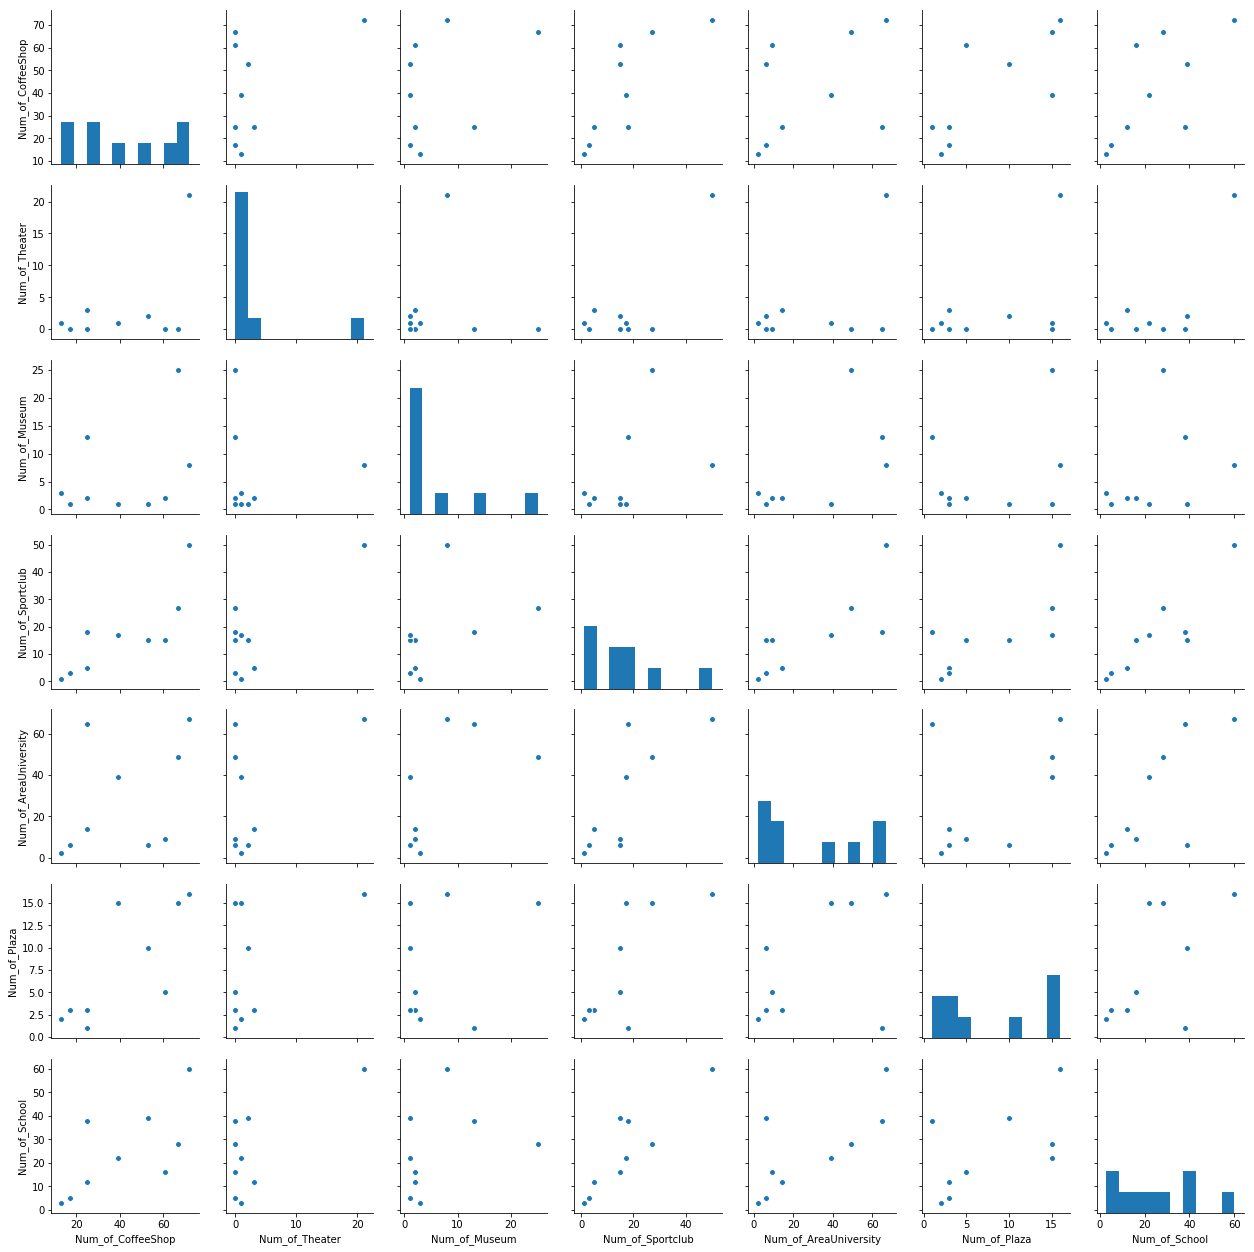

In [17]:
sns.pairplot(finalResults)

### Use k-means from clustering for solve

In [19]:
from sklearn.cluster import KMeans

In [20]:
# set number of clusters
kclusters = 4

coffee_clustering = finalResults.drop('CBD', 1)

# # run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffee_clustering)

# # check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 3, 3, 1, 0, 1, 0, 0])

In [21]:
finalResults['Cluster Labels'] = kmeans.labels_
finalResults['CBD'] = finalResults['CBD'].apply(lambda x: "เขต"+x)
finalResults

,CBD,Num_of_CoffeeShop,Num_of_Theater,Num_of_Museum,Num_of_Sportclub,Num_of_AreaUniversity,Num_of_Plaza,Num_of_School,Cluster Labels
0,เขตปทุมวัน,72,21.0,8,50,67,16,60,2
1,เขตพระนคร,67,0.0,25,27,49,15,28,1
2,เขตพญาไท,61,0.0,2,15,9,5,16,3
3,เขตบางรัก,53,2.0,1,15,6,10,39,3
4,เขตราชเทวี,39,1.0,1,17,39,15,22,1
5,เขตสาทร,25,3.0,2,5,14,3,12,0
6,เขตดุสิต,25,0.0,13,18,65,1,38,1
7,เขตป้อมปราบศัตรูพ่าย,17,0.0,1,3,6,3,5,0
8,เขตสัมพันธวงศ์,13,1.0,3,1,2,2,3,0


In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [57]:
# create map


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for index, row in finalResults.iterrows():
    label = folium.Popup(str(row['CBD']) + ' Cluster ' + str(row['Cluster Labels']), parse_html=True)
    tlat = float(CBDlist[row['CBD']]['lat'])
    tlon = float(CBDlist[row['CBD']]['lon'])
    folium.CircleMarker(
        [tlat,tlon],
        radius=5,
        popup=label,
        color=rainbow[row['Cluster Labels']-1],
        fill=True,
        fill_color=rainbow[row['Cluster Labels']-1],
        fill_opacity=0.7).add_to(map_bangkok)
       
map_bangkok

###  With above data, I can build a k-mean cluster systems to resolve the problem.

Combine with FourSquare API on counting how many different venues (Coffee Shop,Theater,Museum,Sport,University,Plaza,School) 
The k-mean cluster can be applied on possible district locations with venues information to generate a ranking result. The descriptive models can be recommended to new entrepreneur .

## Methodology
 #### The assumption is district to open new coffees shop is dependent how much exsist coffee shop in area and dense in area include with other number of other place like school,Plaza,Sport area that are one of factor to supoort which district have opportunity to open new coffee shop compare with other district. <br>
#### K-means Cluster will apply to solve this model because we need to group district that similaly with 4 group and recommend to new  entrepreneur.
        

## Results
#### In K-mean cluster result is group distirct to 4 groups
   
##### Group 3 Phaya Thai(เขตพญาไท),Bangruk (เขตบางรัก)
##### Group 2 are Pathumwan(เขตปทุมวัน)
##### Group 1 are phra nakhon(เขตพระนคร),Dusit (เขตดุสิต),Ratchathewi(เขตราชเทวี)
##### Group 0 are Sathon(เขตสาทร),Sompanthawong (เขตสัมพันธวงศ์),Pomprap (เขตป้อมปราบศัตรูพ่าย)


### So we recommend Group 1 for new entrepreneur for who want to open new coffee shop by district not dense and have many place location enough to support people to visit when open new  coffee shop



## Discussion
#### The real challenge is constructing the dataset: - Data to consider should not in only FourSquere API because free version data can't get more enough to use to prediction on real life. Have many location that can't provide by FourSqure and have a lot of factor should get data to considering too but is not public so this project may can't use to refer on real life.

## Conclusion
#### For this project is way to advance on future to solve problem by use geo locations.
    
#### Doing this project helps practicing in the specialization, and thus, equipping learners with Data Science methodology and tools using Python libraries and Other API. Also doing a real project certainly helps one learns so much more outside the curriculum, as well as realizes what more to research into after completing the program.
    
### Thank you IBM and Coursera to this course that help me alot to up skill and can adapt to use in real life